Customer Sentimental Analysis - Iphone 15 128gb

Objective:

As a Data Analyst at Flipkart, conduct sentiment analysis on customer reviews of the iPhone 15 128GB model. The objective is to understand public perception, highlight the product’s strengths and weaknesses, and provide data-driven insights to support decision-making.

Libraries and Tools:

TextBlob: Sentiment analysis.
Selenium: Web scraping automation.
Matplotlib/Seaborn: Data visualization.
Pandas: Data cleaning and analysis.
BeautifulSoup: HTML parsing.


1. Data Collection (Web Scraping):

Tools: Selenium, BeautifulSoup
Steps:
Use Selenium to scrape at least 300 reviews from Flipkart's iPhone 15 128GB product page.
Extract Username, Rating, and Review Text.
Handle pagination to collect reviews from multiple pages.

In [27]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import time
import pandas as pd

#Create empty lists to store user information such as Name, Location, Purchase Date, Feedback, and Score.
Names = []
Cities = []
Dates = []
Reviews = []
Ratings = []

# Assign the url of the flipkart website and use selenium to scrape data
url = """https://www.flipkart.com/apple-iphone-15-blue-128-gb/product-reviews/itmbf14ef54f645d?pid=MOBGTAGPAQNVFZZY&lid=LSTMOBGTAGPAQNVFZZYQRLPCQ&marketplace=FLIPKART"""
driver = webdriver.Chrome()
driver.get(url)


while len(Names) < 320:

    time.sleep(2)
    soup = BeautifulSoup(driver.page_source, "html.parser")

    # Extract names
    names_elements= soup.find_all("p", {"class": "_2NsDsF AwS1CA"})
    for name in  names_elements:
        Names.append(name.text)

    # Extract cities
    city_elements = soup.find_all("p", {"class": "MztJPv"}) 
    for city in city_elements:
        Cities.append(city.text)

    # Extract dates
    dates_elements = soup.find_all("p", {"class": "_2NsDsF"}) 
    for date in dates_elements:
        Dates.append(date.text)
    Actual_Dates = Dates[1::2]

    # Extract reviews
    reviews_elements = soup.find_all("div", {"class": "ZmyHeo"})
    for review in reviews_elements:
        Reviews.append(review.text)

    # Extract ratings
    ratings_elements = soup.find_all("div", class_ = "XQDdHH Ga3i8K")
    for ratings in ratings_elements:
        Ratings.append(ratings.text)

    # Try to click the "Next" button
    try:
        next_button = driver.find_element(By.XPATH, "//span[text()='Next']")
        next_button.click()
        time.sleep(5)
    except:
        break

InvalidSessionIdException: Message: invalid session id: session deleted as the browser has closed the connection
from disconnected: not connected to DevTools
  (Session info: chrome=133.0.6943.127)
Stacktrace:
	GetHandleVerifier [0x00007FF7CCD2C6A5+28789]
	(No symbol) [0x00007FF7CCC95B20]
	(No symbol) [0x00007FF7CCB28F9A]
	(No symbol) [0x00007FF7CCB14D75]
	(No symbol) [0x00007FF7CCB39784]
	(No symbol) [0x00007FF7CCBAF0BF]
	(No symbol) [0x00007FF7CCBCF0D2]
	(No symbol) [0x00007FF7CCBA7103]
	(No symbol) [0x00007FF7CCB6FFC0]
	(No symbol) [0x00007FF7CCB71273]
	GetHandleVerifier [0x00007FF7CD071AED+3458237]
	GetHandleVerifier [0x00007FF7CD08829C+3550316]
	GetHandleVerifier [0x00007FF7CD07DB9D+3507565]
	GetHandleVerifier [0x00007FF7CCDF2C6A+841274]
	(No symbol) [0x00007FF7CCCA09EF]
	(No symbol) [0x00007FF7CCC9CB34]
	(No symbol) [0x00007FF7CCC9CCD6]
	(No symbol) [0x00007FF7CCC8C119]
	BaseThreadInitThunk [0x00007FFAE1FEE8D7+23]
	RtlUserThreadStart [0x00007FFAE357BF2C+44]


In [28]:
# Combine data into a DataFrame

df = pd.DataFrame({
    "Name": Names,
    "City": Cities,
    "Date": Actual_Dates,
    "Review": Reviews,
    "Ratings": Ratings
})
df

,Name,City,Date,Review,Ratings
0,CHETAN TILWALIA,"Certified Buyer, Loni",10 months ago,Nice 👌READ MORE,5
1,Ajin V,"Certified Buyer, Balaghat","Oct, 2023",High quality camera😍READ MORE,5
2,Mousam Guha Roy,"Certified Buyer, Matialihat","Oct, 2023",Very niceREAD MORE,4
3,Prithivi Boruah,"Certified Buyer, Bokajan","Oct, 2023",Camera Quality Is Improved Loving ItREAD MORE,5
4,Nikhil Kumar,"Certified Buyer, Meerut Division","Jan, 2024",Switch from OnePlus to iPhone I am stunned wit...,5
...,...,...,...,...,...
95,Rohit Pingale,"Certified Buyer, Raigarh District","Jan, 2024",Nice ColourREAD MORE,5
96,Krishna kishor Singh,"Certified Buyer, Patna","Jan, 2024",best camera phone 🥰READ MORE,5
97,K Deepak,"Certified Buyer, Bengaluru","Dec, 2023",Awesome productREAD MORE,5
98,Subhodeep Roy,"Certified Buyer, Kolkata","Oct, 2023",Fully satisfied 👍🏻READ MORE,5


2. Data Cleaning and Preprocessing:


Tool: Pandas


Remove duplicates and handle missing values.

Text Preprocessing:
Convert text to lowercase, eliminate special characters and extra spaces.
Tokenize the text, filter out stop words, and perform lemmatization.

In [29]:
# Check the basic info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     100 non-null    object
 1   City     100 non-null    object
 2   Date     100 non-null    object
 3   Review   100 non-null    object
 4   Ratings  100 non-null    object
dtypes: object(5)
memory usage: 4.0+ KB


In [30]:
# Drop the duplicates from the dataframe
df1 = df.copy()
df1 = df1.drop_duplicates()
df1

,Name,City,Date,Review,Ratings
0,CHETAN TILWALIA,"Certified Buyer, Loni",10 months ago,Nice 👌READ MORE,5
1,Ajin V,"Certified Buyer, Balaghat","Oct, 2023",High quality camera😍READ MORE,5
2,Mousam Guha Roy,"Certified Buyer, Matialihat","Oct, 2023",Very niceREAD MORE,4
3,Prithivi Boruah,"Certified Buyer, Bokajan","Oct, 2023",Camera Quality Is Improved Loving ItREAD MORE,5
4,Nikhil Kumar,"Certified Buyer, Meerut Division","Jan, 2024",Switch from OnePlus to iPhone I am stunned wit...,5
...,...,...,...,...,...
95,Rohit Pingale,"Certified Buyer, Raigarh District","Jan, 2024",Nice ColourREAD MORE,5
96,Krishna kishor Singh,"Certified Buyer, Patna","Jan, 2024",best camera phone 🥰READ MORE,5
97,K Deepak,"Certified Buyer, Bengaluru","Dec, 2023",Awesome productREAD MORE,5
98,Subhodeep Roy,"Certified Buyer, Kolkata","Oct, 2023",Fully satisfied 👍🏻READ MORE,5


In [31]:
# Convert the Name column data into Title Case
df1['Name'] = df1['Name'].str.title()
df1.head()

,Name,City,Date,Review,Ratings
0,Chetan Tilwalia,"Certified Buyer, Loni",10 months ago,Nice 👌READ MORE,5
1,Ajin V,"Certified Buyer, Balaghat","Oct, 2023",High quality camera😍READ MORE,5
2,Mousam Guha Roy,"Certified Buyer, Matialihat","Oct, 2023",Very niceREAD MORE,4
3,Prithivi Boruah,"Certified Buyer, Bokajan","Oct, 2023",Camera Quality Is Improved Loving ItREAD MORE,5
4,Nikhil Kumar,"Certified Buyer, Meerut Division","Jan, 2024",Switch from OnePlus to iPhone I am stunned wit...,5


In [32]:
#Clean the City column by removing unnecessary characters or parts of the string.
df1['City'] = df1['City'].str.replace("Certified Buyer, ", "", regex=False).str.strip()
df1.head()

,Name,City,Date,Review,Ratings
0,Chetan Tilwalia,Loni,10 months ago,Nice 👌READ MORE,5
1,Ajin V,Balaghat,"Oct, 2023",High quality camera😍READ MORE,5
2,Mousam Guha Roy,Matialihat,"Oct, 2023",Very niceREAD MORE,4
3,Prithivi Boruah,Bokajan,"Oct, 2023",Camera Quality Is Improved Loving ItREAD MORE,5
4,Nikhil Kumar,Meerut Division,"Jan, 2024",Switch from OnePlus to iPhone I am stunned wit...,5


In [34]:
# Clean the Review column by eliminating unnecessary characters or parts of the text and converting it to lowercase.
df1['Review'] = df1['Review'].str.lower().str.replace("read more", "", regex=False)
df1.head()

,Name,City,Date,Review,Ratings
0,Chetan Tilwalia,Loni,10 months ago,nice 👌,5
1,Ajin V,Balaghat,"Oct, 2023",high quality camera😍,5
2,Mousam Guha Roy,Matialihat,"Oct, 2023",very nice,4
3,Prithivi Boruah,Bokajan,"Oct, 2023",camera quality is improved loving it,5
4,Nikhil Kumar,Meerut Division,"Jan, 2024",switch from oneplus to iphone i am stunned wit...,5


3. Sentiment Analysis:


Tool: TextBlob

Steps:
Analyze sentiment using TextBlob’s polarity score (-1 to +1).
Classify sentiment:
Positive: Polarity ≥ 0.1
Negative: Polarity < 0.1
Store sentiment classification in the dataset.

In [53]:
# Import necessary libraries for sentiment analysis of review sentences.
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import string

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

#Create a column named Reviews_t that contains tokenized sentences from the Review column using the sent_tokenize function.
df1["Reviews_t"] = df1['Review'].apply(sent_tokenize)
df1

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ST\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ST\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ST\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Name,City,Date,Review,Ratings,Reviews_t
0,Chetan Tilwalia,Loni,10 months ago,nice 👌,5,[nice 👌]
1,Ajin V,Balaghat,"Oct, 2023",high quality camera😍,5,[high quality camera😍]
2,Mousam Guha Roy,Matialihat,"Oct, 2023",very nice,4,[very nice]
3,Prithivi Boruah,Bokajan,"Oct, 2023",camera quality is improved loving it,5,[camera quality is improved loving it]
4,Nikhil Kumar,Meerut Division,"Jan, 2024",switch from oneplus to iphone i am stunned wit...,5,[switch from oneplus to iphone i am stunned wi...
...,...,...,...,...,...,...
95,Rohit Pingale,Raigarh District,"Jan, 2024",nice colour,5,[nice colour]
96,Krishna Kishor Singh,Patna,"Jan, 2024",best camera phone 🥰,5,[best camera phone 🥰]
97,K Deepak,Bengaluru,"Dec, 2023",awesome product,5,[awesome product]
98,Subhodeep Roy,Kolkata,"Oct, 2023",fully satisfied 👍🏻,5,[fully satisfied 👍🏻]


In [55]:
# Import mean from the statistics module for basic statistical calculations.
from statistics import mean


# A function was created to assign polarity to the Reviews_t column.
def get_polarity(sentences):
    return [TextBlob(sentence).sentiment.polarity for sentence in sentences]

# Calls get_polarity function on the Reviews_t column to assign polarity
df1['Polarity'] = df1['Reviews_t'].apply(get_polarity)


# Function created to calculate the average polarity of each review (Average of polarity for each sentences in a review)
def calculate_average_polarity(polarities):
    return mean(polarities) if polarities else 0

# Calls the calculate_average_polarity function on the Polarity column to assign the average polarity to each review.
df1['Average_Polarity'] = df1['Polarity'].apply(calculate_average_polarity)
df1['Average_Polarity'] = df1['Average_Polarity'].round(2)
df1.head(10)

,Name,City,Date,Review,Ratings,Reviews_t,Polarity,Average_Polarity
0,Chetan Tilwalia,Loni,10 months ago,nice 👌,5,[nice 👌],[0.6],0.60
1,Ajin V,Balaghat,"Oct, 2023",high quality camera😍,5,[high quality camera😍],[0.16],0.16
2,Mousam Guha Roy,Matialihat,"Oct, 2023",very nice,4,[very nice],[0.78],0.78
3,Prithivi Boruah,Bokajan,"Oct, 2023",camera quality is improved loving it,5,[camera quality is improved loving it],[0.6],0.60
4,Nikhil Kumar,Meerut Division,"Jan, 2024",switch from oneplus to iphone i am stunned wit...,5,[switch from oneplus to iphone i am stunned wi...,"[0.0, 1.0]",0.50
5,Bijaya Mohanty,Baleshwar,9 months ago,just go for it.amazing one.beautiful camera wi...,5,[just go for it.amazing one.beautiful camera w...,[0.26666666666666666],0.27
6,Flipkart Customer,Aizawl,"Jan, 2024",awesome photography experience. battery backup...,5,"[awesome photography experience., battery back...","[1.0, 0.7, 0.5]",0.73
7,Sheetla Prasad Maurya,Sultanpur,"Oct, 2023",best mobile phonecamera quality is very nice b...,4,[best mobile phonecamera quality is very nice ...,[0.738],0.74
8,Flipkart Customer,Agartala,10 months ago,using this iphone 15 from 1month and it has be...,5,[using this iphone 15 from 1month and it has b...,[1.0],1.00
9,Arunji Govindaraju,Chennai,"Feb, 2024",awesome product very happy to hold this. bette...,5,"[awesome product very happy to hold this., bet...","[1.0, 0.5, 0.45555555555555555]",0.65


In [56]:
# Function to assign the Class to the Polarity
def sentiment_class(polarity):
    if polarity > 0.75:
        return 'extremely positive'
    elif 0 < polarity <= 0.75:
        return 'positive'
    elif polarity == 0:
        return 'neutral'
    elif -0.75 <= polarity < 0:
        return 'negative'
    else:
        return 'extremely negative'

# Calls sentiment_class function on the Average_Polarit column to assign the sentiment class
df1['Sentiment_Class'] = df1['Average_Polarity'].apply(sentiment_class)

In [57]:
df1.head()

,Name,City,Date,Review,Ratings,Reviews_t,Polarity,Average_Polarity,Sentiment_Class
0,Chetan Tilwalia,Loni,10 months ago,nice 👌,5,[nice 👌],[0.6],0.60,positive
1,Ajin V,Balaghat,"Oct, 2023",high quality camera😍,5,[high quality camera😍],[0.16],0.16,positive
2,Mousam Guha Roy,Matialihat,"Oct, 2023",very nice,4,[very nice],[0.78],0.78,extremely positive
3,Prithivi Boruah,Bokajan,"Oct, 2023",camera quality is improved loving it,5,[camera quality is improved loving it],[0.6],0.60,positive
4,Nikhil Kumar,Meerut Division,"Jan, 2024",switch from oneplus to iphone i am stunned wit...,5,[switch from oneplus to iphone i am stunned wi...,"[0.0, 1.0]",0.50,positive


In [59]:
# Computes and displays the overall average polarity score for the entire dataset of reviews.
polarity_score = df1['Average_Polarity'].mean().round(2)
print(f'Average Polarity Score : {polarity_score}')
if polarity_score > 0.75:
        print('The Average Polarity Score is Extremely Positive')
elif 0 < polarity_score <= 0.75:
    print('The Average Polarity Score is Positive')
elif polarity_score == 0:
    print('The Average Polarity Score is Neutral')
elif -0.75 <= polarity_score < 0:
    print('The Average Polarity Score is Negative')
else:
    print('The Average Polarity Score is Extremely Negative')

Average Polarity Score : 0.51
The Average Polarity Score is Positive


4. Data Analysis and Insights:

Tools: Pandas, Matplotlib/Seaborn

Steps:
Sentiment Distribution: Calculate positive and negative sentiment proportions.
Average Rating vs Sentiment: Analyze correlation between numeric ratings (1-5 stars) and sentiment.
Word Cloud: Generate a word cloud for frequently mentioned words in positive/negative reviews.
Review Length Analysis: Investigate the relationship between review length and sentiment.

In [62]:
# Imports libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

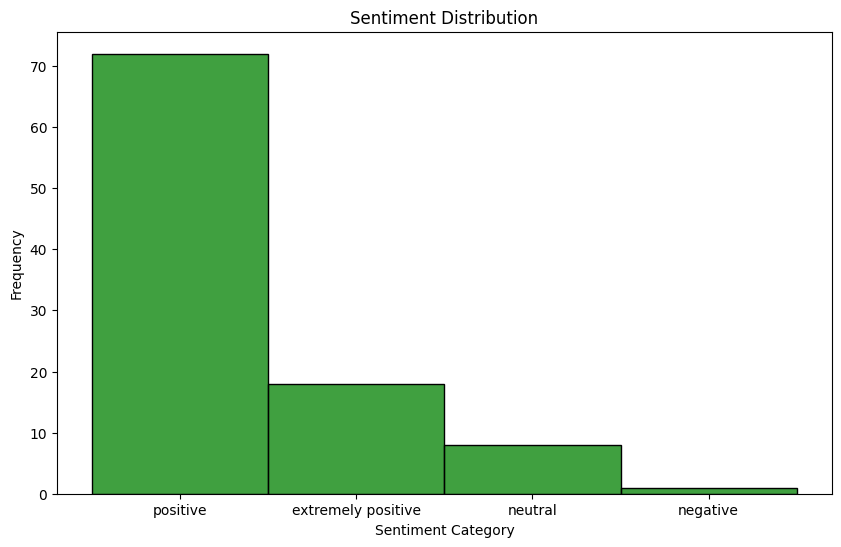

In [64]:
# Plots figure for Sentiment Distribution based on Sentiment Category
plt.figure(figsize=(10, 6))
sns.histplot(x=df1.Sentiment_Class, color='green')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

Sentiment Distribution

The bar chart illustrates the distribution of sentiment categories within the dataset. The x-axis represents different sentiment categories, while the y-axis indicates their frequency of occurrence. The categories are as follows:

Positive: The most common sentiment, occurring more than 200 times.


Extremely Positive: This category comes next but is significantly less frequent than "Positive."


Neutral: Observed less frequently compared to both positive sentiment categories.


Negative: The rarest sentiment found in the dataset.

The chart clearly highlights a strong bias toward positive sentiments, with "Positive" as the most dominant category, followed by "Extremely Positive." Neutral and negative sentiments appear significantly less often.

In [69]:
df1['Review_Length'] = df1['Review'].apply(lambda x: len(x.split()))

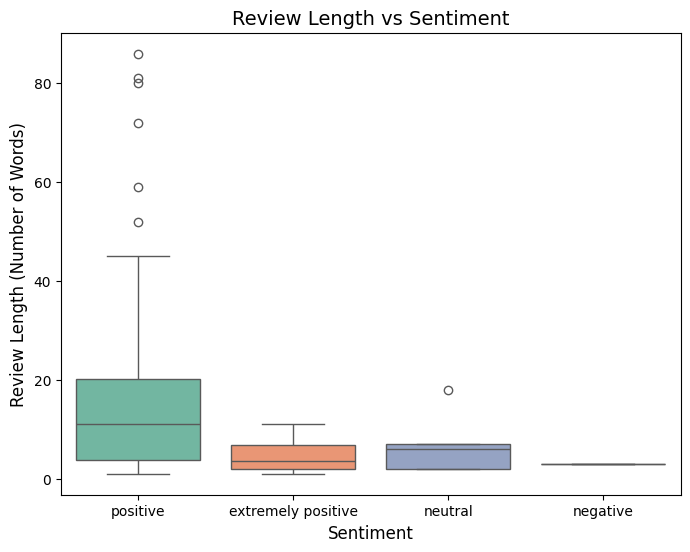

In [71]:
# Box Plot for Review Length by Sentiment
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sentiment_Class', y='Review_Length', data=df1, hue = 'Sentiment_Class', palette='Set2')
plt.title('Review Length vs Sentiment', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Review Length (Number of Words)', fontsize=12)
plt.show()

Review Length Vs Sentiment

Correlation:

Reviews with a more positive sentiment generally correspond to higher ratings (e.g., 4.5–5 stars), as indicated by the clustering and color gradient.

Neutral Reviews:

Neutral reviews appear across different ratings, indicating that sentiment does not always correspond to the given star rating.

Negative Reviews:

Negative and extremely negative reviews generally receive lower ratings, though variations exist due to individual reviewer perspectives and subjective interpretation.

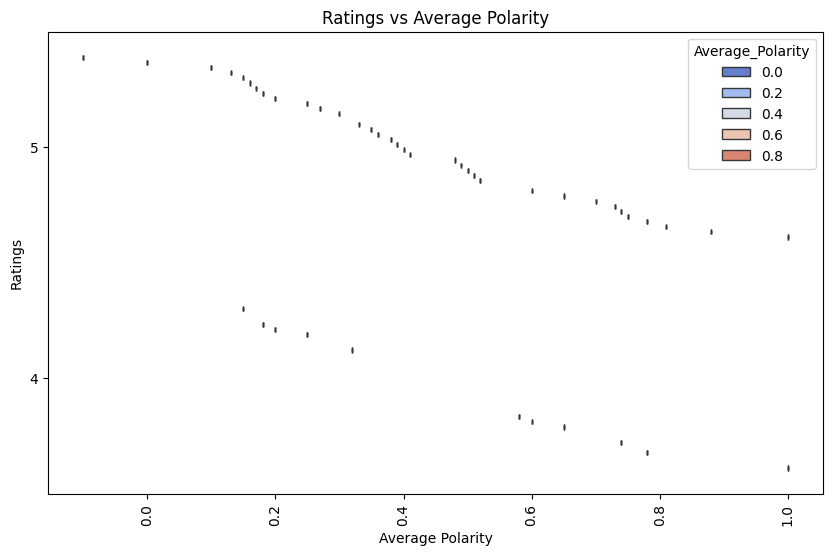

In [74]:
# Plotting ratings vs average polarity
plt.figure(figsize=(10, 6))
sns.boxplot(x='Average_Polarity', y='Ratings', data = df1, hue = 'Average_Polarity', palette='coolwarm')
plt.title('Ratings vs Average Polarity')
plt.xlabel('Average Polarity')
plt.ylabel('Ratings')
plt.xticks(rotation=90)
plt.show()

Ratings vs. Average Polarity
Positive Sentiment:

Shows the greatest variation in review length, with a few notable outliers.
The median review length is higher compared to other sentiment categories.


Extremely Positive Sentiment:

Features the shortest review lengths overall, with a more compact distribution and fewer outliers.
Neutral Sentiment:
Has a narrower range of review lengths, similar to the "Extremely Positive" sentiment group.


Negative Sentiment:

Displays a moderate variation in review lengths.
The median length is shorter than "Positive" but longer than both "Extremely Positive" and "Neutral."


Interpretation:

Positive reviews are generally more detailed (longer) compared to other sentiment categories.
Extremely positive and neutral reviews tend to be shorter.
Negative reviews vary in length but are generally more concise than positive ones.


5. Reporting

Summary of Findings

1. Data Collection and Cleaning Process

Data Source: Customer reviews for the iPhone 15 128GB were extracted from Flipkart using web scraping techniques with tools like Selenium and BeautifulSoup.


Data Preparation:

Unnecessary characters were removed, text formatting was standardized, and extra spaces were eliminated.
The review text was tokenized to prepare it for further analysis.
Sentiments were classified into different categories (e.g., positive, extremely positive, neutral, negative, extremely negative) using sentiment analysis techniques.


3. Sentiment Analysis Findings

   
Sentiment Breakdown:

Most reviews reflected positive sentiment, followed by a smaller proportion of extremely positive feedback, as illustrated in the sentiment distribution chart.
Neutral and negative sentiments accounted for a much smaller share of the overall reviews.


Sentiment by Rating:


Higher star ratings were mostly linked with positive or extremely positive sentiments.
Lower star ratings often corresponded to neutral or negative feedback, indicating dissatisfaction among those users.



5. Key Insights

Positive Aspects:

Customers frequently praised the design, camera quality, and overall performance of the iPhone 15.
Many reviews mentioned improvements in battery life as a significant advantage.
Common Complaints:

Neutral and negative reviews often highlighted concerns about pricing and occasional delivery or packaging issues.
Some customers reported minor software glitches and compatibility issues with certain accessories.


4. Recommendations
Product Enhancements:

    Address minor software bugs reported by users to enhance the overall experience.
    Investigate accessory compatibility concerns to ensure a seamless user experience.


Marketing Suggestions:

    Highlight camera quality, battery life, and sleek design in promotional campaigns.
    Offer EMI plans, exchange deals, or time-limited discounts to alleviate pricing concerns and improve accessibility.


    
Operational Improvements:

     Enhance delivery services to minimize complaints about packaging and shipping delays.
     Continuously monitor customer feedback to identify and resolve emerging issues efficiently.











